In [1]:
# Import numpy as np: Numpy is a fundamental package for scientific computing in Python. It provides support for arrays, matrices,
# and a large collection of mathematical functions to operate on these data structures. By importing numpy as np, we can access
# all of numpy's functions with the prefix np, making the code more concise and readable.
import numpy as np

# From sklearn.cluster import MeanShift: Scikit-learn is a popular library for machine learning in Python. The MeanShift class
# from the sklearn.cluster module is used for Mean Shift clustering, a type of unsupervised learning algorithm that assigns data
# points to clusters by moving points towards the mode (the highest density of data points in the region). This line imports
# the MeanShift class so it can be used to perform clustering on data.
from sklearn.cluster import MeanShift

# From sklearn.datasets import make_blobs: The sklearn.datasets module contains several functions to generate synthetic datasets
# for testing machine learning algorithms. The make_blobs function generates isotropic Gaussian blobs for clustering, which is
# useful for creating a simple dataset with a specified number of clusters to test the clustering algorithm. This line imports
# the make_blobs function.
from sklearn.datasets import make_blobs

# Import matplotlib.pyplot as plt: Matplotlib is a comprehensive library for creating static, animated, and interactive
# visualizations in Python. Pyplot is a module in matplotlib that provides a MATLAB-like interface for making plots. By importing
# pyplot as plt, we can easily create plots and graphs of our data for visualization with simple commands.
import matplotlib.pyplot as plt

# From mpl_toolkits.mplot3d import Axes3D: The mpl_toolkits.mplot3d module is part of matplotlib's toolkit library and provides
# tools for creating 3D plots. Axes3D is a class that enables 3D plotting capabilities by creating a 3D axes object. Importing
# Axes3D allows us to plot data in three dimensions, which is particularly useful for visualizing clusters when our dataset has
# three features.
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Import the style module from matplotlib to customize the appearance of plots.
from matplotlib import style

# Set the default plot style to 'ggplot'.
# 'ggplot' is a style inspired by the ggplot2 library used in the R programming language, known for its aesthetically pleasing graphics.
# When you set the style to 'ggplot', all plots created after this statement will automatically adopt this style.
# This includes making use of its characteristic grey background with grid lines and using colors that are easy on the eyes.
style.use("ggplot")

In [4]:
# Define the centers of the clusters to be generated.
# Each center is specified as a point in a 3-dimensional space. Here, we define three centers:
# the first center is at (1, 1, 1), the second at (5, 5, 5), and the third at (3, 10, 10).
# These centers will guide the distribution of the generated data points around them.
centers = [[1, 1, 1], [5, 5, 5], [3, 10, 10]]

# Generate synthetic data for clustering.
# `make_blobs` is used to generate isotropic Gaussian blobs for clustering. This function is particularly useful for
# simulating data for experiments involving clustering algorithms.
# Parameters:
# - n_samples: The total number of points equally divided among clusters. Here, we generate 100 samples.
# - centers: The number of centers to generate, or the fixed center locations. By providing the `centers` variable,
#   we instruct the function to place the generated blobs around the points defined in `centers`.
# - cluster_std: The standard deviation of the clusters. A higher value will disperse the cluster points further from
#   the center. Here, a standard deviation of 2 is used, which determines the spread of each cluster around its center.
# The function returns two arrays: `X` and `y`. `X` is a 2-dimensional array of shape [n_samples, n_features],
# containing the generated samples. `y` is a 1-dimensional array of shape [n_samples], containing the integer
# labels for cluster membership of each sample.
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=2)

In [5]:
# Initialize the MeanShift clustering algorithm.
# MeanShift is a non-parametric clustering algorithm that does not require the number of clusters to be specified in advance.
# It works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered
# in a post-processing stage to eliminate near-duplicates, forming the final set of centroids.
ms = MeanShift()

# Fit the MeanShift model to the dataset X.
# The 'fit' method takes the dataset X (a 2D array-like structure where rows represent samples and columns represent features)
# and performs the clustering process. It identifies the centroids of the clusters based on the density of data points, assigning
# each sample in X to the nearest cluster centroid. After this step, the model has learned the clusters from the data,
# and the labels for each data point indicating cluster membership can be accessed.
ms.fit(X)

MeanShift()

In [6]:
# After performing clustering with a clustering algorithm (e.g., Mean Shift, stored in the variable 'ms'),
# we retrieve the coordinates of the cluster centers and the cluster labels for each data point.

# Retrieve the cluster centers from the clustering model.
# 'cluster_centers_' is an attribute of the fitted clustering model that holds the coordinates of the cluster centers.
# A cluster center is a point that represents the central point of a cluster, calculated as the mean of all points in the cluster.
centroids = ms.cluster_centers_

# Retrieve the cluster labels from the clustering model.
# 'labels_' is an attribute of the fitted clustering model that holds the cluster label for each data point in the dataset.
# A cluster label is an integer that represents the cluster to which a data point has been assigned.
labels = ms.labels_

# Print the coordinates of the cluster centers.
# This will output an array where each element corresponds to the coordinates of a cluster center.
# The coordinates are determined by the feature space of the dataset, so each value represents the position of a center in that space.
print(centroids)

# Print the cluster labels for each data point.
# This will output an array where each element is the cluster label of a data point.
# These labels correspond to the indices of the cluster centers in the 'centroids' array.
print(labels)

[[3.01406439 2.25687921 2.4908921 ]
 [4.32498638 6.13613972 7.20520908]]
[1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1]


In [14]:
# np.unique(labels) returns the unique values in the 'labels' array. In the context of clustering,
# these unique values represent the distinct cluster IDs assigned to each data point. Therefore,
# the length of this unique values array (achieved via len(np.unique(labels))) gives us the total
# number of unique clusters formed by the clustering algorithm.
n_clusters_ = len(np.unique(labels))

# Print the number of estimated clusters to the console. This is useful for understanding
# how many distinct groups the algorithm has identified in the data. The output is particularly
# helpful in exploratory data analysis and in determining if the number of clusters formed
# is in line with expectations or domain knowledge.
print("Number of estimated clusters:", n_clusters_)


Number of estimated clusters: 2


Coordinate: [ 1.73730004 11.39450023  8.56026729] Label: 1
Coordinate: [-4.8350372   2.68550902  3.62040463] Label: 0
Coordinate: [2.5007538  2.40142272 1.68550859] Label: 0
Coordinate: [ 3.3228711  10.57725929  9.0145656 ] Label: 1
Coordinate: [3.31800995 7.69136558 8.76200096] Label: 1
Coordinate: [3.18441418 4.16287014 6.96215924] Label: 1
Coordinate: [2.54235012 9.77117983 7.60822659] Label: 1
Coordinate: [-0.75999073 -0.58410798  1.61318112] Label: 0
Coordinate: [ 0.46157655  0.85310223 -0.88322982] Label: 0
Coordinate: [-0.29361123  1.10890556 -2.65270006] Label: 0
Coordinate: [ 0.8182562  -0.65601852  0.89059075] Label: 0
Coordinate: [4.55032972 2.51896907 0.1432717 ] Label: 0
Coordinate: [ 4.09176992  9.40477417 13.78539294] Label: 1
Coordinate: [ 4.97396954 10.00240882  7.64603244] Label: 1
Coordinate: [5.56126029 7.19141422 4.81515122] Label: 1
Coordinate: [4.36151291 2.69337923 5.51321903] Label: 0
Coordinate: [8.15644695 2.39853378 2.66265852] Label: 0
Coordinate: [2.179027

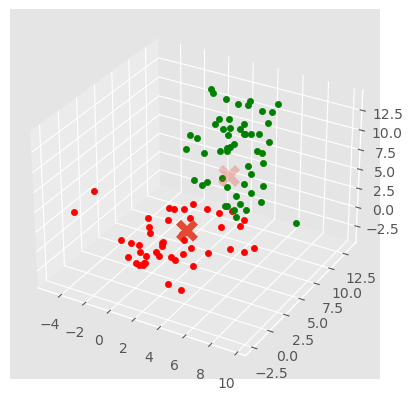

In [7]:
# Define a list of colors for plotting different clusters.
colors = ['r', 'g', 'b', 'c', 'k', 'y', 'm']

# Create a new figure for plotting.
fig = plt.figure()

# Add a 3D subplot to the figure. '111' means 1x1 grid, first subplot.
# 'projection='3d'' indicates that the plot should be in three dimensions.
ax = fig.add_subplot(111, projection='3d')

# Loop through each point in the dataset (X) to plot them.
# 'len(X)' gives the number of points in the dataset.
for i in range(len(X)):
    # Print the coordinate and label of each point in the dataset.
    # 'X[i]' refers to the ith point in the dataset, and 'labels[i]' refers to its cluster label.
    print("Coordinate:", X[i], "Label:", labels[i])
    
    # Scatter plot for each point. 'X[i][0]', 'X[i][1]', and 'X[i][2]' are the x, y, and z coordinates of the point.
    # 'c=colors[labels[i]]' assigns a color based on the cluster label. 'marker='o'' uses a circle marker for the points.
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

# Plot the centroids of the clusters.
# 'centroids[:,0]', 'centroids[:,1]', and 'centroids[:,2]' extract the x, y, and z coordinates of the centroids.
# 'marker="x"' uses an x-shaped marker for the centroids.
# 's=150' sets the size of the markers. 'linewidths=5' sets the linewidth of the markers.
# 'zorder=10' ensures that the centroids are plotted above the other points for visibility.
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker="x", s=150, linewidths=5, zorder=10)

# Display the plot.
plt.show()